📂 Loading data from: C:\Tugas\tubes\ML\finalterm\Regression\midterm-regresi-dataset.csv
✅ Data Loaded. Shape: (515345, 91)
--- Scaling Data ---
Training on 412276 songs...
Testing on  103069 songs...

--- Training Model 1: Random Forest ---
(This takes about 30-60 seconds...)
🌲 Random Forest RMSE: 9.3150 years

--- Training Model 2: Neural Network ---
🧠 Neural Network RMSE: 9.6074 years

--- Generating Graph ---


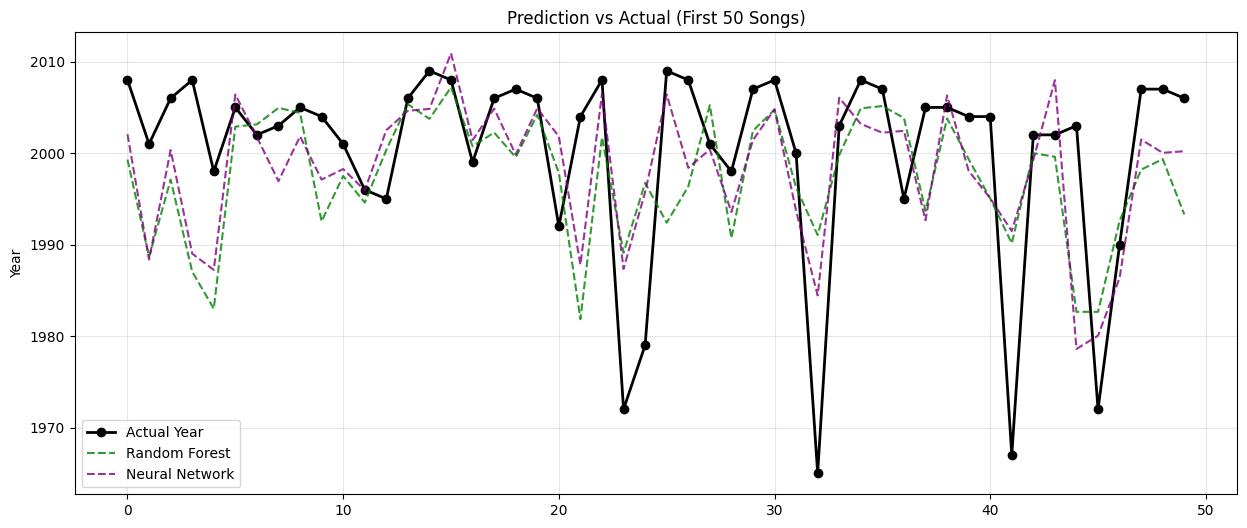


   COPY THESE TO YOUR README:
| Random Forest RMSE  | 9.3150 |
| Neural Network RMSE | 9.6074 |


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# --- 1. CONFIGURATION ---
# We use r"..." to handle the backslashes in your Windows path
dataset_path = r"C:\Tugas\tubes\ML\finalterm\Regression"
filename = 'midterm-regresi-dataset.csv'
file_path = os.path.join(dataset_path, filename)

print(f"📂 Loading data from: {file_path}")

# --- 2. DATA LOADING & PREPROCESSING ---
# The dataset has NO HEADER. Row 0 is actual data, not labels.
# We must set header=None, or we lose the first song!
df = pd.read_csv(file_path, header=None)

# Rename the first column to 'Year' (Target) for clarity
df.rename(columns={0: 'Year'}, inplace=True)

print(f"✅ Data Loaded. Shape: {df.shape}")

# Split Features (X) and Target (y)
X = df.drop('Year', axis=1)  # All 90 audio features
y = df['Year']               # The Year to predict

# Scale the features (CRITICAL for Neural Networks)
print("--- Scaling Data ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f"Training on {len(X_train)} songs...")
print(f"Testing on  {len(X_test)} songs...")

# --- 3. MODEL 1: RANDOM FOREST (Traditional ML) ---
print("\n--- Training Model 1: Random Forest ---")
print("(This takes about 30-60 seconds...)")
# n_estimators=20 is enough for a quick comparison
rf_model = RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate RMSE
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"🌲 Random Forest RMSE: {rmse_rf:.4f} years")

# --- 4. MODEL 2: NEURAL NETWORK (Deep Learning) ---
print("\n--- Training Model 2: Neural Network ---")
# A simple Deep Learning architecture (64 -> 32 neurons)
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), 
                         activation='relu', 
                         solver='adam', 
                         max_iter=50,  # Limited for speed
                         early_stopping=True,
                         random_state=42)
mlp_model.fit(X_train, y_train)

# Calculate RMSE
y_pred_mlp = mlp_model.predict(X_test)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"🧠 Neural Network RMSE: {rmse_mlp:.4f} years")

# --- 5. VISUALIZATION ---
print("\n--- Generating Graph ---")
plt.figure(figsize=(15, 6))
# Plot first 50 songs to see how close the predictions are
plt.plot(y_test.values[:50], label='Actual Year', color='black', marker='o', linewidth=2)
plt.plot(y_pred_rf[:50], label='Random Forest', linestyle='--', color='green', alpha=0.8)
plt.plot(y_pred_mlp[:50], label='Neural Network', linestyle='--', color='purple', alpha=0.8)

plt.title("Prediction vs Actual (First 50 Songs)")
plt.ylabel("Year")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 6. FINAL RESULTS BLOCK ---
print("\n" + "="*35)
print("   COPY THESE TO YOUR README:")
print("="*35)
print(f"| Random Forest RMSE  | {rmse_rf:.4f} |")
print(f"| Neural Network RMSE | {rmse_mlp:.4f} |")
print("="*35)